In [1]:
# Importing necessary libraries

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import seaborn as sn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)


# Load the dataset
file_path = "Epileptic Seizure Recognition.csv"  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [2]:
# Getting the distribution of the 'y' column
class_distribution = data['y'].value_counts()
print(class_distribution)
#Data is ballanced accross the categories of EEG readings

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64


[0 1]
The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


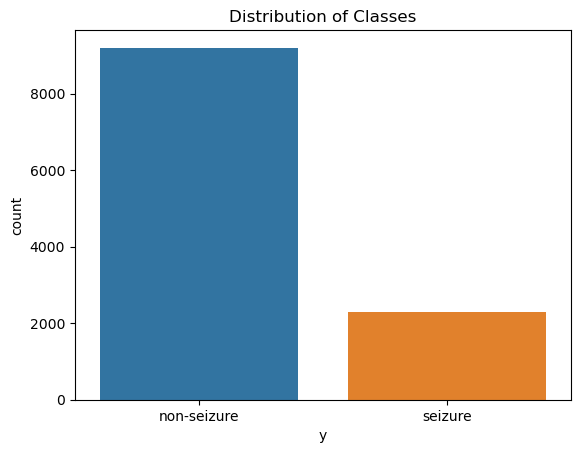

In [3]:
cols = data.columns
tgt = data.y.copy()  # Create a copy
tgt[tgt > 1] = 0

# Check unique values in tgt to ensure there's both 0 and 1
print(tgt.unique())

ax = sn.countplot(x=tgt, label="Count")  # 'x' argument makes it explicit
ax.set_title("Distribution of Classes")
ax.set_xticklabels(['non-seizure', 'seizure'])

non_seizure, seizure = tgt.value_counts().sort_index()  # Sort by index to ensure the order

print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)


In [4]:
# Checking if there are any nulls
print(data.isnull().sum())
# Basic information
print(data.info())
print("\nThe dataset has 180 columns. Most of them represent the EEG signal values, and the 'y' column indicates the category. The dataset has no missing values in any column.\n")

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB
None

The dataset has 180 columns. Most of them represent the EEG signal values, and the 'y' column indicates the category. The dataset has no missing values in any column.



In [5]:
print(data.describe())
print("\nThese are the basic statistical summaries for each column." 
      "\nFor the EEG signals, this gives an idea about the distribution, mean, and variance of the readings."
      "\nThe min and max values provide the amplitude range of the EEG readings."
      "\nBigger variance could be a spike in electrical activity, which can be an indication of a seizure")

                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.033

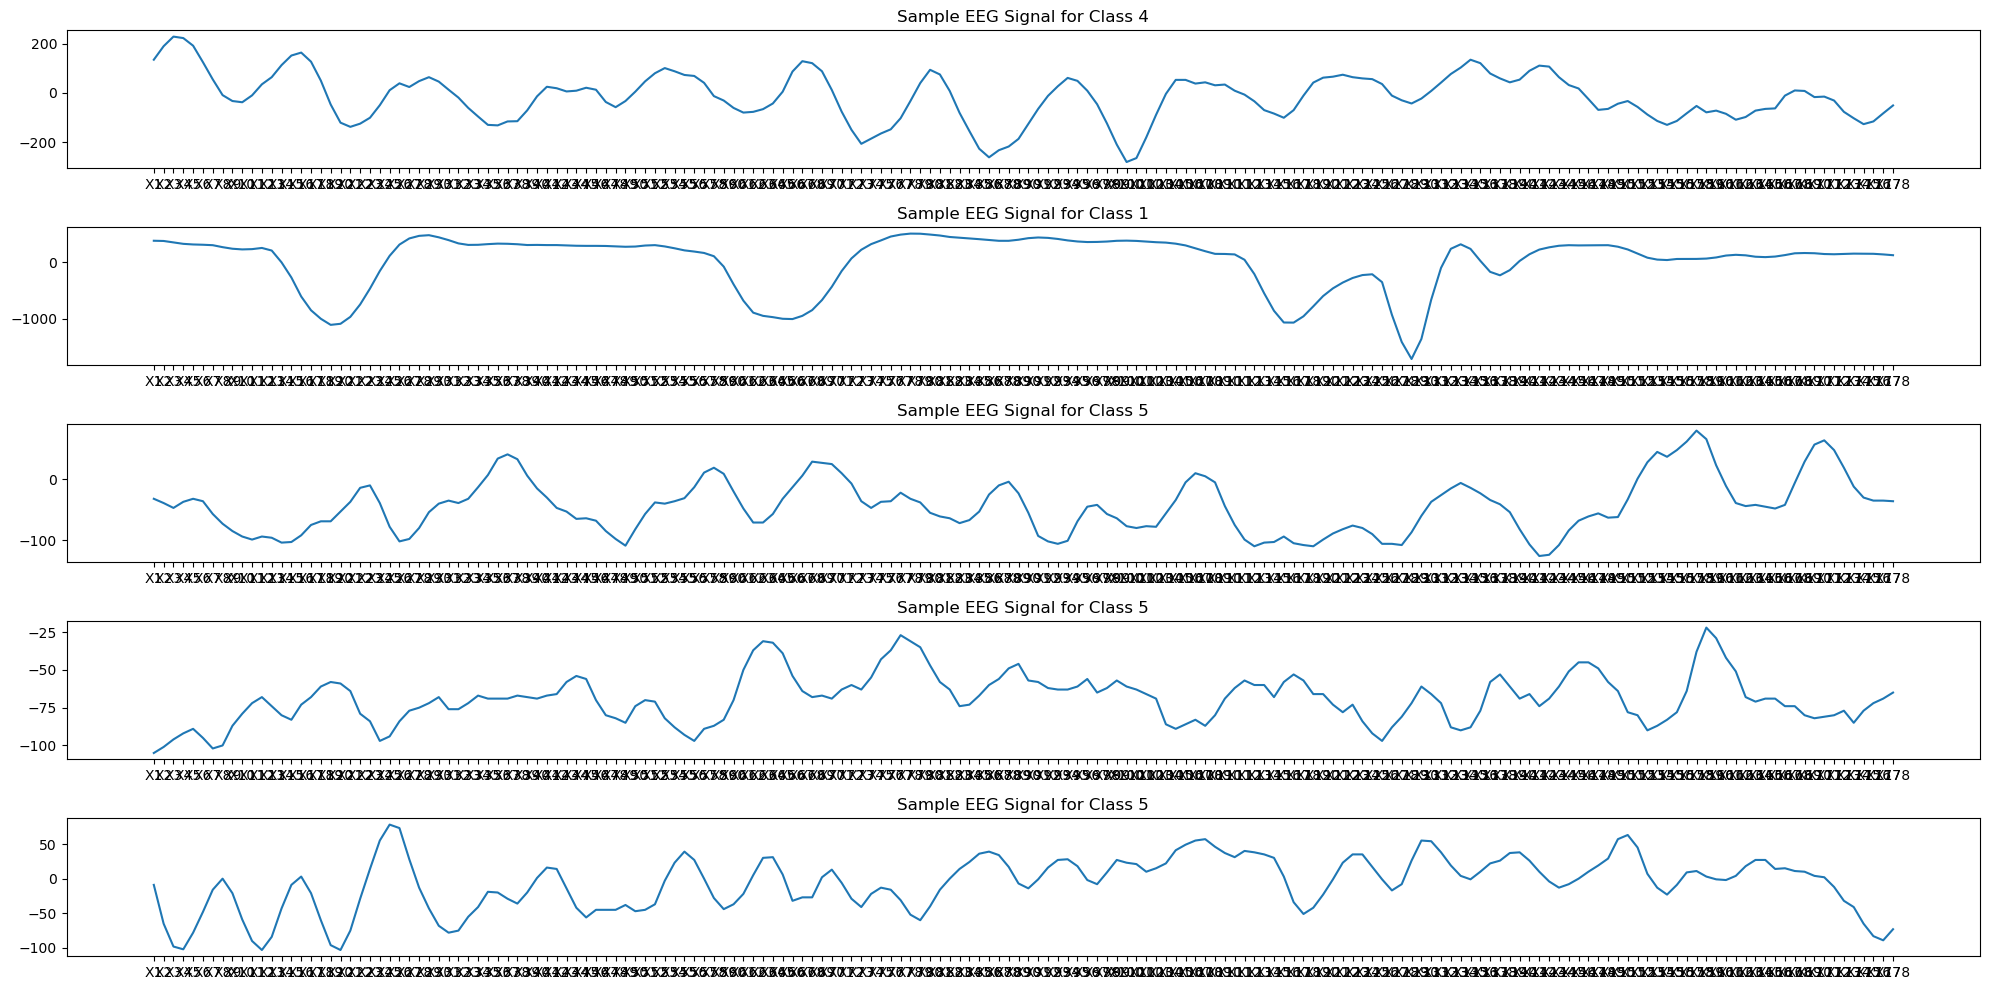

These plots represent sample EEG signals for different classes.
There are variations and patterns specific to each class.
Class 1, representing Epileptic Seizures, show biggers spikes


In [6]:
# Plotting some sample EEG signals
plt.figure(figsize=(20, 10))

for i in range(5):  # Plotting first 5 rows as samples
    plt.subplot(5, 1, i+1)
    plt.plot(data.iloc[i, 1:-1])  # Skipping 'Unnamed' and 'y' column
    plt.title(f"Sample EEG Signal for Class {data.iloc[i, -1]}")
    plt.tight_layout()

plt.show()

# Visualizing EEG signals from various categories can give insights into potential patterns or anomalies.
print("These plots represent sample EEG signals for different classes." 
      "\nThere are variations and patterns specific to each class."
      "\nClass 1, representing Epileptic Seizures, show biggers spikes")


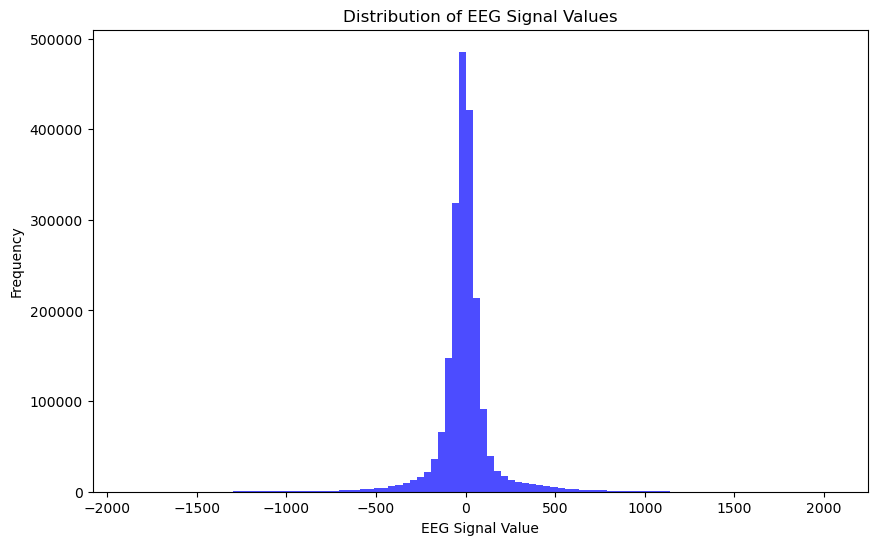

The plotted graphs represent the average EEG signals for each class.
The mean values seem to hover around zero, which is expected for EEG data after preprocessing like baseline correction.


In [7]:
# Plotting histogram of all EEG signal values
plt.figure(figsize=(10, 6))
plt.hist(data.drop(columns=['Unnamed', 'y']).values.flatten(), bins=100, color='blue', alpha=0.7)
plt.title("Distribution of EEG Signal Values")
plt.xlabel("EEG Signal Value")
plt.ylabel("Frequency")
plt.show()

print("The plotted graphs represent the average EEG signals for each class."
     "\nThe mean values seem to hover around zero, which is expected for EEG data after preprocessing like baseline correction.")

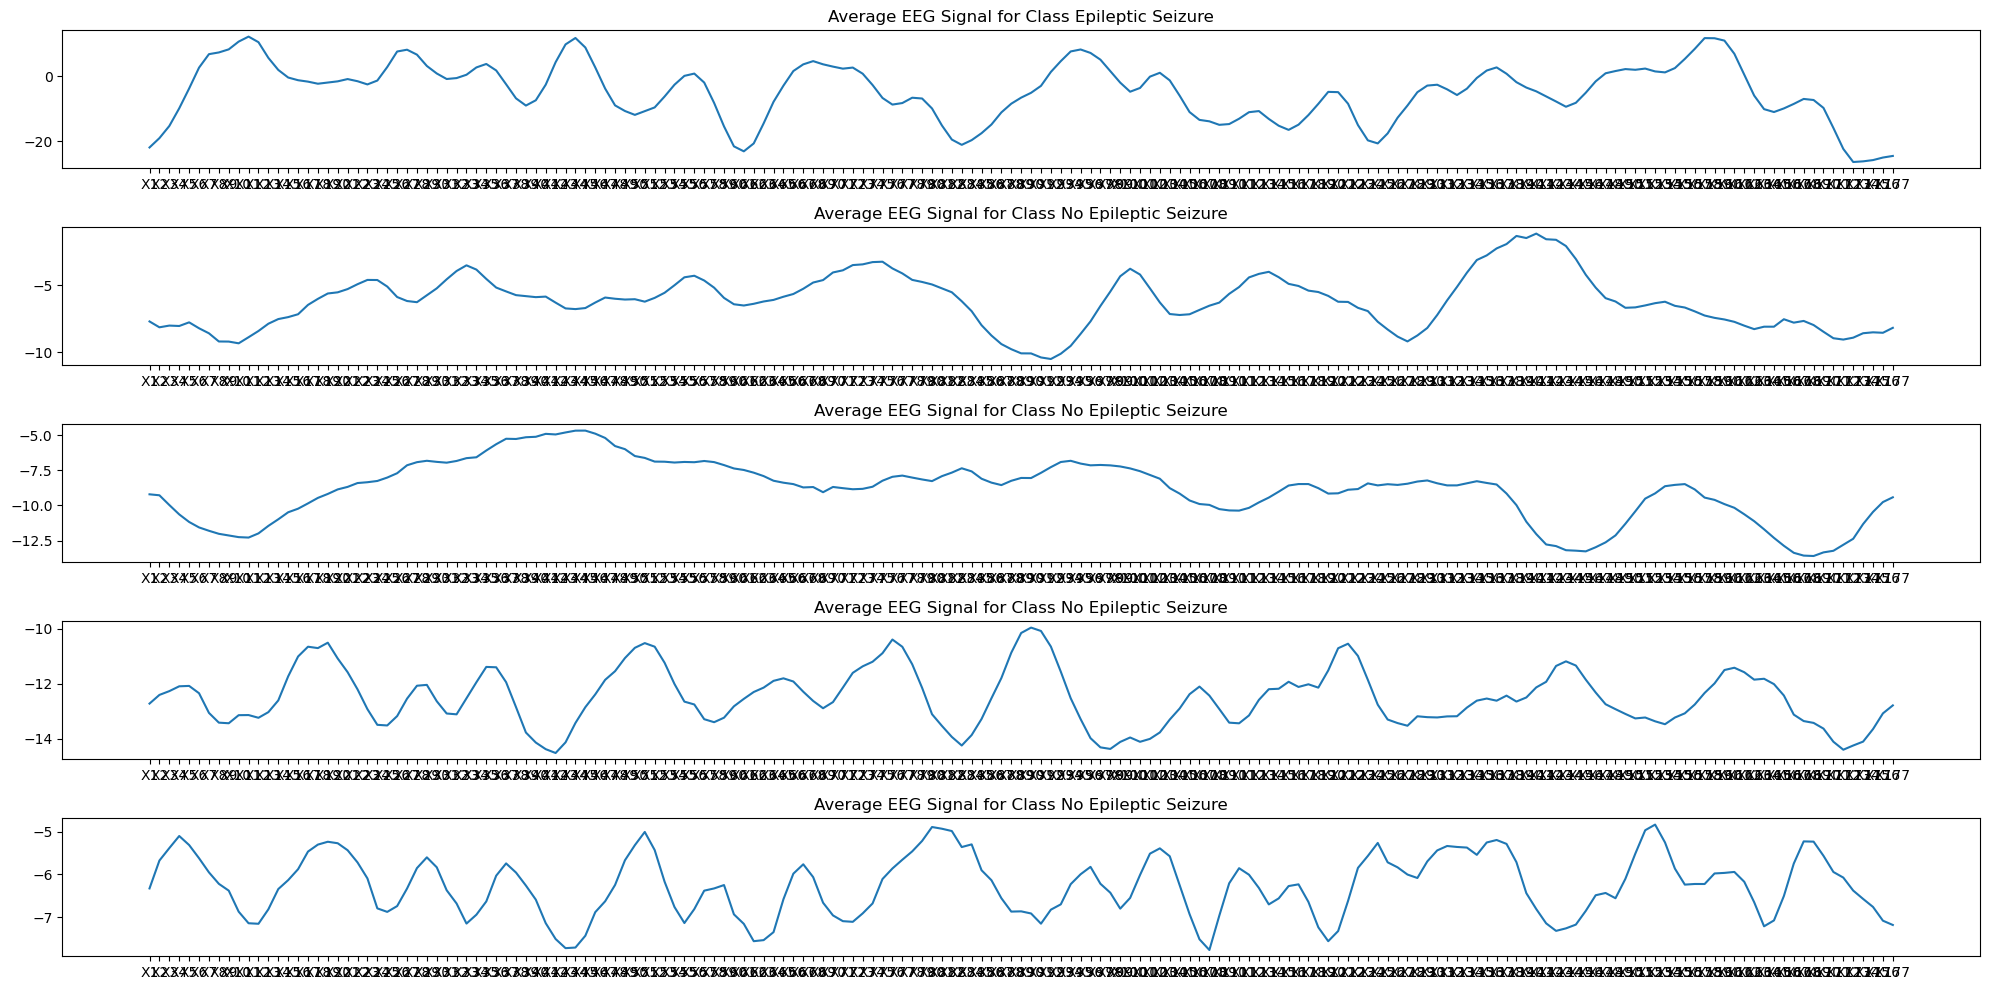

In [8]:
# Grouping by class and computing mean for each EEG signal column
grouped_data = data.groupby('y').mean()

# Plotting average EEG signals per class
plt.figure(figsize=(20, 10))

# Excluding the 'y' column to correctly match dimensions
x_values = grouped_data.columns[:-1]

for i in range(grouped_data.shape[0]):  # Iterating through each unique value of 'y'
    plt.subplot(grouped_data.shape[0], 1, i+1)
    plt.plot(x_values, grouped_data.iloc[i, :-1])
    plt.title(f"Average EEG Signal for Class {'Epileptic Seizure' if grouped_data.index[i] == 1 else 'No Epileptic Seizure'}")
    plt.tight_layout()

plt.show()

In [9]:
# Dropping the Unnamed column of the reading identifier because it is not useful for the building of the model
data.drop('Unnamed', axis=1, inplace=True)

In [10]:
# Convert the 'y' column to binary
data['y'] = data['y'].apply(lambda x: 1 if x == 1 else 0)

# Check the new distribution
print(data['y'].value_counts())

print("Converted the 'y' column to binary representation. The class '1' now represents 'Epileptic Seizure' and '0' represents 'No Epileptic Seizure'.")
#The Classes Meaning: 
# 1- Seizure activity
# 2- EEG from the tumor region
# 3- EEG from the healthy brain area near a tumor
# 4- Eyes closed
# 5- Eyes open

0    9200
1    2300
Name: y, dtype: int64
Converted the 'y' column to binary representation. The class '1' now represents 'Epileptic Seizure' and '0' represents 'No Epileptic Seizure'.


In [11]:
# Split the data into features (X) and target (y) 
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the scaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


In [12]:
# Handle imbalance using SMOTE

print("Handling Data Imbalance with SMOTE:")
print("----------------------------------")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_resampled).value_counts()}\n")
print("="*80 + "\n")

Handling Data Imbalance with SMOTE:
----------------------------------
Class distribution after SMOTE:
0    7360
1    7360
Name: y, dtype: int64




In [13]:
# Logistic Regression
print("Logistic Regression Classifier:")
print("------------------------------")
print("Logistic Regression estimates probabilities using a logistic/sigmoid function, and it works for binary classification problems.")
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_scaled)  # Renamed to 'y_pred_logreg'
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("="*80 + "\n")


Logistic Regression Classifier:
------------------------------
Logistic Regression estimates probabilities using a logistic/sigmoid function, and it works for binary classification problems.
Accuracy: 69.39%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1840
           1       0.32      0.45      0.37       460

    accuracy                           0.69      2300
   macro avg       0.58      0.60      0.58      2300
weighted avg       0.74      0.69      0.71      2300

ROC-AUC Score: 0.6032608695652174
F1 Score: 0.37142857142857144



In [14]:
# Decision Tree

print("Decision Tree Classifier:")
print("--------------------------")
print("A decision tree classifier creates a tree-like model of decisions based on the features.")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("="*80 + "\n")

Decision Tree Classifier:
--------------------------
A decision tree classifier creates a tree-like model of decisions based on the features.
Accuracy: 90.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1840
           1       0.73      0.86      0.79       460

    accuracy                           0.91      2300
   macro avg       0.85      0.89      0.87      2300
weighted avg       0.92      0.91      0.91      2300




In [15]:
# K-Nearest Neighbors

print("K-Nearest Neighbors Classifier:")
print("------------------------------")
print("K-NN classifies a data point based on how its neighbors are classified.")
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("="*80 + "\n")

K-Nearest Neighbors Classifier:
------------------------------
K-NN classifies a data point based on how its neighbors are classified.
Accuracy: 96.43%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1840
           1       0.97      0.85      0.91       460

    accuracy                           0.96      2300
   macro avg       0.97      0.92      0.94      2300
weighted avg       0.96      0.96      0.96      2300




In [16]:
# Support Vector Machine

print("Support Vector Machine Classifier:")
print("---------------------------------")
print("SVM tries to find the best hyperplane that separates the classes in the input feature space.")
svc = SVC(kernel='linear', probability=True, random_state=42)  
svc.fit(X_train_resampled, y_train_resampled)
y_pred_svc = svc.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("="*80 + "\n")

Support Vector Machine Classifier:
---------------------------------
SVM tries to find the best hyperplane that separates the classes in the input feature space.
Accuracy: 82.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1840
           1       0.66      0.28      0.39       460

    accuracy                           0.83      2300
   macro avg       0.75      0.62      0.65      2300
weighted avg       0.81      0.83      0.80      2300




In [17]:
# Random Forest

print("Random Forest Classifier:")
print("------------------------")
print("Random Forest builds multiple decision trees and merges them to get a more accurate and stable prediction.")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("="*80 + "\n")

Random Forest Classifier:
------------------------
Random Forest builds multiple decision trees and merges them to get a more accurate and stable prediction.
Accuracy: 97.09%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1840
           1       0.88      0.98      0.93       460

    accuracy                           0.97      2300
   macro avg       0.94      0.98      0.96      2300
weighted avg       0.97      0.97      0.97      2300




In [18]:
# Evaluation of Models

models = [logreg, dt, knn, svc, rf]
model_names = ["Logistic Regression", "Decision Tree", "K-NN", "SVM", "Random Forest"]
preds = [y_pred_logreg, y_pred_dt, y_pred_knn, y_pred_svc, y_pred_rf]

for i, model in enumerate(models):
    print(f"Classification Report for {model_names[i]}:\n")
    print(classification_report(y_test, preds[i]))
    print("="*80)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1840
           1       0.32      0.45      0.37       460

    accuracy                           0.69      2300
   macro avg       0.58      0.60      0.58      2300
weighted avg       0.74      0.69      0.71      2300

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1840
           1       0.73      0.86      0.79       460

    accuracy                           0.91      2300
   macro avg       0.85      0.89      0.87      2300
weighted avg       0.92      0.91      0.91      2300

Classification Report for K-NN:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1840
           1       0.97      0.85      0.91       460

    accuracy                           0.96      2300
   ma

In [19]:
# Model Enhancement & Iteration: Hyperparameter Tuning using GridSearchCV for Random Forest

# Parameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search.best_estimator_

# Predict using best model
y_pred_best_rf = best_rf.predict(X_test_scaled)
print(f"Classification Report for Best Random Forest:\n")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Classification Report for Best Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1840
           1       0.88      0.98      0.93       460

    accuracy                           0.97      2300
   macro avg       0.94      0.98      0.96      2300
weighted avg       0.97      0.97      0.97      2300



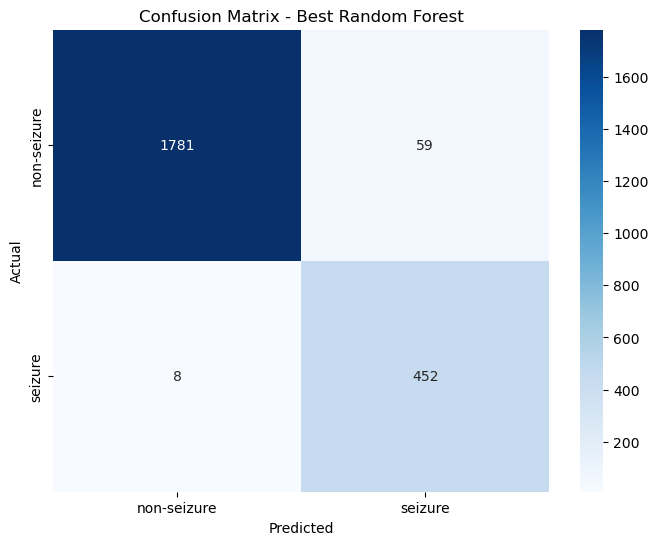

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['non-seizure', 'seizure'], 
            yticklabels=['non-seizure', 'seizure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Best Random Forest')
plt.show()


In [21]:
# Using the best parameters from grid search
cv_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Cross-validation scores (5-fold): {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")


Cross-validation scores (5-fold): [0.98131793 0.9752038  0.9701087  0.97927989 0.97452446]
Mean CV accuracy: 0.976 +/- 0.004
